# This notebook contains the Gene Suitability Test for the 2nd orfN-catalyzed reaction (rxn ACGAMT). It contains the following sections:
### Gap-filling
### Min and Max orfN flux limits
### Perturbations through orfN reaction
### PCA (original + annotated)
### orfN reaction flux vs biomass flux

In [1]:
# importing PA14 metabolic model of P. aeruginosa
import cobra
from cobra import Model, Reaction, Metabolite
model = cobra.io.read_sbml_model("iSD1509MModel.xml")
model

Name,iSDXXXX
Memory address,10ae518b0
Number of metabolites,1642
Number of reactions,2021
Number of genes,1510
Number of groups,7
Objective expression,1.0*BIOMASS_PA14_v27M - 1.0*BIOMASS_PA14_v27M_reverse_0dc58
Compartments,"cytosol, extracellular space, periplasm"


In [2]:
default_bounds = {}
for rs in model.reactions:
    default_bounds[rs.id] = rs.bounds
    
# Making resetting model function
def reset_model(model, def_bounds, obj):
    for rs in model.reactions:
        try:
            rs.bounds = def_bounds[rs.id]
        except KeyError:
            pass
        
        rs.objective_coefficient = 0
        
        if rs.id == obj:
            rs.objective_coefficient = 1

reset_model(model, default_bounds, 'BIOMASS_PA14_v27M')

## Gap-filling

In [3]:
# Checking current biomass reaction
biomass_rxn = model.reactions.get_by_id('BIOMASS_PA14_v27M')
print(f"Reaction ID: {biomass_rxn.id}")
print(f"Reaction name: {biomass_rxn.name}")
print(f"Reaction equation: {biomass_rxn.reaction}")
print(f"Lower bound: {biomass_rxn.lower_bound}")
print(f"Upper bound: {biomass_rxn.upper_bound}")
print(f"Objective coefficient: {biomass_rxn.objective_coefficient}")
print(f"Metabolites:")
for metabolite, coefficient in biomass_rxn.metabolites.items():
    print(f"{metabolite.id}: {coefficient}")


Reaction ID: BIOMASS_PA14_v27M
Reaction name: Changed stoichiometry from original (RNA, Glycogen, Formula Wts), scaled
Reaction equation: 0.0002629250362 2fe2s_c + 0.0218082581186 PA_core_lipidA_c + 0.5114586280634 ala__L_c + 0.3347179859799 arg__L_c + 0.1163039750092 asn__L_c + 0.2337604590002 asp__L_c + 70.4958884983908 atp_c + 0.0072362236879 clpn160_c + 0.0038348089867 clpn161_c + 0.000348176308 clpn180_c + 0.0109468579074 clpn181_c + 0.0004942642694 clpn_pa_17_0_cyc_c + 0.000900875762 clpn_pa_19_0_cyc_c + 0.0001971967204 coa_c + 0.161115895419 ctp_c + 0.0442179279331 cys__L_c + 0.0127328513395 datp_c + 0.0250500903207 dctp_c + 0.0250500903207 dgtp_c + 0.0127328513395 dttp_c + 0.266984355176 gln__L_c + 0.1886815390631 glu__L_c + 0.367824371436 gly_c + 0.1815236055988 glycogen_c + 0.1610581353701 gtp_c + 66.0234962815776 h2o_c + 0.095542994587 his__L_c + 0.1833822575686 ile__L_c + 0.545109630509 leu__L_c + 0.1268098853154 lys__L_c + 0.0904990729257 met__L_c + 0.0002629250362 mlthf_c

In [4]:
-0.0218082581186/2

-0.0109041290593

In [5]:
# Adding LPS B and LPS A to a new biomass reaction
new_biomass_rxn = Reaction(id="BIOMASS_PA14_v27M_LPSA_B")
new_biomass_rxn.name = "Biomass reaction with PA_core_lipidA_c removed and LPS A and LPS B added compared to BIOMASS_PA14_v27M"
new_biomass_rxn.lower_bound = 0.0
new_biomass_rxn.upper_bound = 999999.0
model.add_reactions([new_biomass_rxn])
new_biomass_rxn.add_metabolites({
    'datp_c': -0.0127328513395, 
    'dctp_c': -0.0250500903207, 
    'dgtp_c': -0.0250500903207, 
    'dttp_c': -0.0127328513395,
    'ctp_c': -0.161115895419, 
    'gtp_c': -0.1610581353701, 
    'utp_c': -0.0818728251174, 
    'ala__L_c': -0.5114586280634, 
    'arg__L_c': -0.3347179859799,
    'asn__L_c': -0.1163039750092, 
    'asp__L_c': -0.2337604590002, 
    'cys__L_c': -0.0442179279331, 
    'gln__L_c': -0.266984355176,
    'glu__L_c': -0.1886815390631, 
    'gly_c': -0.367824371436, 
    'his__L_c': -0.095542994587, 
    'ile__L_c': -0.1833822575686, 
    'leu__L_c': -0.545109630509,
    'lys__L_c': -0.1268098853154, 
    'met__L_c': -0.0904990729257, 
    'phe__L_c': -0.1554757214595, 
    'pro__L_c': -0.2231799745834,
    'ser__L_c': -0.2438663808951, 
    'thr__L_c': -0.1851584772934, 
    'trp__L_c': -0.0656048789199, 
    'tyr__L_c': -0.1111131649483,
    'val__L_c': -0.3007573879843, 
    'glycogen_c': -0.1815236055988, 
    'pe160_c': -0.0440332489728, 
    'pe180_c': -0.0019052207574,
    'pe161_c': -0.0186791573555, 
    'pe181_c': -0.0627923456608, 
    'pe_pa_17_0_cyc_c': -0.0012523828755, 
    'pe_pa_19_0_cyc_c': -0.0027845534146,
    'pg160_c': -0.0115620050953, 
    'pg180_c': -0.0003882433662, 
    'pg161_c': -0.0034971315335, 
    'pg181_c': -0.0106413977194, 
    'pg_pa_17_0_cyc_c': -0.0007294269305,
    'pg_pa_19_0_cyc_c': -0.0014588538609, 
    'clpn160_c': -0.0072362236879, 
    'clpn180_c': -0.000348176308, 
    'clpn161_c': -0.0038348089867,
    'clpn181_c': -0.0109468579074, 
    'clpn_pa_17_0_cyc_c': -0.0004942642694, 
    'clpn_pa_19_0_cyc_c': -0.000900875762, 
    'peptido_pa_c': -0.0629017241191,
    'PA_LPS_A_c': -0.0109041290593, 
    'PA_LPS_B_c': -0.0109041290593, 
    'ptrc_c': -0.0760531829063, 
    'q9h2_c': -0.0002629250362, 
    'mlthf_c': -0.0002629250362, 
    'coa_c': -0.0001971967204, 
    'thmpp_c': -0.0002629250362, 
    '2fe2s_c': -0.0002629250362, 
    'atp_c': -70.4958884983908,
    'h2o_c': -66.0234962815776, 
    'h_c': 70.413945350228, 
    'ppi_c': 0.5615558873897, 
    'adp_c': 70.413945350228, 
    'pi_c': 70.413945350228})

In [6]:
# Changing objective function to new biomass reaction
reset_model(model, default_bounds, 'BIOMASS_PA14_v27M_LPSA_B')

In [7]:
# Checking new biomass reaction
biomass_rxn = model.reactions.get_by_id('BIOMASS_PA14_v27M_LPSA_B')
print(f"Reaction ID: {biomass_rxn.id}")
print(f"Reaction name: {biomass_rxn.name}")
print(f"Reaction equation: {biomass_rxn.reaction}")
print(f"Lower bound: {biomass_rxn.lower_bound}")
print(f"Upper bound: {biomass_rxn.upper_bound}")
print(f"Objective coefficient: {biomass_rxn.objective_coefficient}")
print(f"Metabolites:")
for metabolite, coefficient in biomass_rxn.metabolites.items():
    print(f"{metabolite.id}: {coefficient}")

Reaction ID: BIOMASS_PA14_v27M_LPSA_B
Reaction name: Biomass reaction with PA_core_lipidA_c removed and LPS A and LPS B added compared to BIOMASS_PA14_v27M
Reaction equation: 0.0002629250362 2fe2s_c + 0.0109041290593 PA_LPS_A_c + 0.0109041290593 PA_LPS_B_c + 0.5114586280634 ala__L_c + 0.3347179859799 arg__L_c + 0.1163039750092 asn__L_c + 0.2337604590002 asp__L_c + 70.4958884983908 atp_c + 0.0072362236879 clpn160_c + 0.0038348089867 clpn161_c + 0.000348176308 clpn180_c + 0.0109468579074 clpn181_c + 0.0004942642694 clpn_pa_17_0_cyc_c + 0.000900875762 clpn_pa_19_0_cyc_c + 0.0001971967204 coa_c + 0.161115895419 ctp_c + 0.0442179279331 cys__L_c + 0.0127328513395 datp_c + 0.0250500903207 dctp_c + 0.0250500903207 dgtp_c + 0.0127328513395 dttp_c + 0.266984355176 gln__L_c + 0.1886815390631 glu__L_c + 0.367824371436 gly_c + 0.1815236055988 glycogen_c + 0.1610581353701 gtp_c + 66.0234962815776 h2o_c + 0.095542994587 his__L_c + 0.1833822575686 ile__L_c + 0.545109630509 leu__L_c + 0.1268098853154 l

In [9]:
# Ensuring old biomass reaction is no longer objective function
old_biomass = model.reactions.get_by_id('BIOMASS_PA14_v27M')
old_biomass.objective_coefficient

0.0

## Gene suitability test for orfN reaction #2 - Rxn ACGAMT
### Maximizing flux through rxn ACGAMT

In [12]:
ACGAMT_rxn = model.reactions.get_by_id('ACGAMT')
print(ACGAMT_rxn)

ACGAMT: uacgam_c + udcpp_c --> ump_c + unaga_c


In [13]:
# for rxns in orfN_rxn:
    # reset model
reset_model(model, default_bounds, 'BIOMASS_PA14_v27M_LPSA_B')
    
    # Limit growth to minimum of 0.05
model.reactions.BIOMASS_PA14_v27M_LPSA_B.bounds = 0.05, 1000

    # Make rxn of interest the objective function
model.reactions.BIOMASS_PA14_v27M_LPSA_B.objective_coefficient = 0
ACGAMT_rxn.objective_coefficient = 1
    
    # Optimize model to maximize flux through rxn
max_flux = model.optimize(objective_sense='maximize')
print(max_flux.objective_value)

max_flux_val = max_flux.objective_value

0.01724760358873678


### Minimizing flux through reaction ACGAMT

In [14]:
# for rxns in reactions_murA:
    #reset model
reset_model(model, default_bounds, 'BIOMASS_PA14_v27M_LPSA_B')
    
    # Limit growth to minimum of 0.05
model.reactions.BIOMASS_PA14_v27M_LPSA_B.bounds = 0.05, 1000

    # Make rxn of interest the objective function
model.reactions.BIOMASS_PA14_v27M_LPSA_B.objective_coefficient = 0
ACGAMT_rxn.objective_coefficient = 1
    
    # Optimize model to minimize flux through rxn
min_flux = model.optimize(objective_sense='minimize')
print(min_flux.objective_value)
    
min_flux_val = min_flux.objective_value

0.000545206452965


In [15]:
# State newly determined bounds for reaction
min_flux_val, max_flux_val

(0.000545206452965, 0.01724760358873678)

### Perturbations through orfN reaction ACGAMT

In [16]:
import numpy as np
import pandas as pd
my_flux_vals = np.linspace(min_flux_val, max_flux_val, num=400)
my_flux_vals

array([0.00054521, 0.00058707, 0.00062893, 0.00067079, 0.00071265,
       0.00075451, 0.00079637, 0.00083823, 0.00088009, 0.00092195,
       0.00096381, 0.00100567, 0.00104753, 0.00108939, 0.00113126,
       0.00117312, 0.00121498, 0.00125684, 0.0012987 , 0.00134056,
       0.00138242, 0.00142428, 0.00146614, 0.001508  , 0.00154986,
       0.00159172, 0.00163358, 0.00167544, 0.0017173 , 0.00175917,
       0.00180103, 0.00184289, 0.00188475, 0.00192661, 0.00196847,
       0.00201033, 0.00205219, 0.00209405, 0.00213591, 0.00217777,
       0.00221963, 0.00226149, 0.00230335, 0.00234521, 0.00238707,
       0.00242894, 0.0024708 , 0.00251266, 0.00255452, 0.00259638,
       0.00263824, 0.0026801 , 0.00272196, 0.00276382, 0.00280568,
       0.00284754, 0.0028894 , 0.00293126, 0.00297312, 0.00301498,
       0.00305685, 0.00309871, 0.00314057, 0.00318243, 0.00322429,
       0.00326615, 0.00330801, 0.00334987, 0.00339173, 0.00343359,
       0.00347545, 0.00351731, 0.00355917, 0.00360103, 0.00364

In [17]:
# reset objective function to biomass
reset_model(model, default_bounds, 'BIOMASS_PA14_v27M_LPSA_B')
# Checking objective function
for reactions in model.reactions:
    if reactions.objective_coefficient == 1:
        print(f'The objective function is: {reactions.id}')

The objective function is: BIOMASS_PA14_v27M_LPSA_B


In [18]:
ACGAMT_rxn.bounds = 0.01004757, 0.01004757

# Optimize model to maximize flux through biomass rxn
# with specific flux through orfN
solution = model.optimize(objective_sense='maximize')
print(solution.objective_value)

0.9214463571880187


In [19]:
# Model flux vector corresponding with this solution
solution.fluxes

solution_df = solution.to_frame()
solution_df = solution_df[solution_df['fluxes'] != 0]
solution_df

,fluxes,reduced_costs
3HAACOAT60,-0.873515,-0.000000e+00
3HAD100,0.804359,0.000000e+00
3HAD120,0.388703,0.000000e+00
3HAD121,0.415656,0.000000e+00
3HAD140,0.250391,0.000000e+00
...,...,...
rJB00277,0.010048,0.000000e+00
rxn00295,0.010048,0.000000e+00
EX_itacon_e,21.272315,0.000000e+00
BIOMASS_PA14_v27M,0.664103,0.000000e+00


In [20]:
ACGAMT_rxn.bounds = 0.000545206452965, 0.000545206452965

# Optimize model to maximize flux through biomass rxn
# with specific flux through orfN
solution = model.optimize(objective_sense='maximize')
print(solution.objective_value)

0.05


In [22]:
ACGAMT_rxn.bounds = 0.01724760358873678, 0.01724760358873678

# Optimize model to maximize flux through biomass rxn
# with specific flux through orfN
solution = model.optimize(objective_sense='maximize')
print(solution.objective_value)

1.5817497660692588


In [23]:
# Create empty list to input rows for each orfN flux
row_list = []
# Loop through orfN fluxes to get corresponding network fluxes
for flux in my_flux_vals:
    # Reset model
    # reset_model(model, default_bounds, 'BIOMASS_PA14_v27M_LPSA_B')
    # reset_model function doesn't finish running, so leaving it out (shouldn't impact results)
    # Set orfN flux bounds
    ACGAMT_rxn.bounds = flux, flux
    solution = model.optimize(objective_sense='maximize')
    row_list.append(solution.fluxes)

matrix_df = pd.DataFrame(row_list)
matrix_df

,1PPDCRc,2AGPE140tipp,2AGPE141tipp,2AGPG140tipp,2AGPG141tipp,2DHGLCK,2DHGLCNkt_tpp,2HH24DDH1,2MAHMP,3_4DHBZ1t_pp,...,BIOMASS_PA14_v27M,BIOMASS_PA14_v27M_ANA,PYOO2exNET,AHGDx,SHGO,ACTD2_SS,23DHBSpp,ACPS1,ACPpds,BIOMASS_PA14_v27M_LPSA_B
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.540563e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050000
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.536702e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053839
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.532841e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057678
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.528980e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061517
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.525119e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.544424e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.566394
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.158318e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.570233
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.722120e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.574072
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.861060e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.577911


In [24]:
print(matrix_df['ACGAMT'])

fluxes    0.000545
fluxes    0.000587
fluxes    0.000629
fluxes    0.000671
fluxes    0.000713
            ...   
fluxes    0.017080
fluxes    0.017122
fluxes    0.017164
fluxes    0.017206
fluxes    0.017248
Name: ACGAMT, Length: 400, dtype: float64


In [25]:
matrix_df = matrix_df.drop('ACGAMT', axis=1)
matrix_df
matrix_df.shape

(400, 2021)

In [26]:
print(matrix_df['ACGAMT'])

KeyError: 'ACGAMT'

In [ ]:
# Adding column of orfN flux values to dataframe for annotation
# orfN1_flux_values = my_flux_vals.tolist()
# orfN1_flux_values

In [ ]:
# matrix_df["orfN Flux Values"] = orfN1_flux_values

In [ ]:
# matrix_df.shape

### PCA

In [27]:
# Importing PCA class from sklearn
from sklearn.decomposition import PCA

# Fit PCA model to matrix
pca = PCA()
pca.fit(matrix_df)

PCA()

In [28]:
# Looking at the principal components formed
components = pca.components_
components

array([[ 5.82771837e-17, -3.51917270e-17,  3.56766614e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -6.55864800e-01],
       [ 2.74331525e-06,  9.23897446e-08, -7.20500828e-07, ...,
        -0.00000000e+00, -0.00000000e+00, -6.82471673e-02],
       [-5.33327917e-06, -4.13224597e-06,  3.55491132e-06, ...,
        -0.00000000e+00, -0.00000000e+00, -1.34978345e-01],
       ...,
       [ 4.00728620e-02,  1.98859236e-02, -4.32840514e-02, ...,
         0.00000000e+00,  0.00000000e+00, -4.52289206e-02],
       [ 9.52477791e-02,  1.16706591e-01, -3.42195859e-02, ...,
         0.00000000e+00,  0.00000000e+00,  9.96628080e-02],
       [-2.55852017e-03, -9.33731328e-03,  1.90807643e-02, ...,
         0.00000000e+00,  0.00000000e+00, -4.22127721e-02]])

In [29]:
# Explained variance ratio of each principal component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[1.00000000e+00 4.29165927e-24 8.75021461e-26 2.99226870e-26
 2.19891773e-26 3.45679826e-27 1.06244450e-27 6.42149725e-28
 5.85217358e-28 4.40247892e-28 3.78791847e-28 2.53847795e-28
 2.00463761e-28 1.19903121e-28 1.10691289e-28 9.17108307e-29
 5.12345413e-29 4.21818021e-29 4.02293374e-29 3.40285644e-29
 3.38341342e-29 2.89104761e-29 2.49633199e-29 2.13719920e-29
 2.05585124e-29 1.69839053e-29 1.62101558e-29 1.47967040e-29
 1.27755829e-29 9.06425752e-30 8.14554766e-30 7.10153384e-30
 5.44971392e-30 5.19759810e-30 4.56154716e-30 3.99345899e-30
 3.12551302e-30 2.78532702e-30 2.32457377e-30 2.24378307e-30
 2.08798481e-30 2.00987791e-30 1.85656271e-30 1.62871214e-30
 1.29125911e-30 1.19839122e-30 1.16737828e-30 1.06465008e-30
 8.62333304e-31 8.01355913e-31 7.88860905e-31 7.01292850e-31
 5.97393793e-31 5.45575482e-31 4.65908202e-31 4.46956675e-31
 3.95405255e-31 3.87257995e-31 3.73052741e-31 3.25454779e-31
 2.88753706e-31 2.62035429e-31 2.37778271e-31 2.25049954e-31
 2.03260181e-31 1.988249

In [30]:
# Keeping only first 2 principial components
pca_2 = PCA(n_components=2)
pca_2.fit(matrix_df)
print(pca_2.explained_variance_ratio_)

[1.00000000e+00 4.29165519e-24]


In [31]:
# Transform original matrix to principal component space
pca_matrix = pca_2.transform(matrix_df)
print(pca_matrix)
pca_matrix.shape

[[ 1.16773287e+00  5.64256974e-13]
 [ 1.16187957e+00  4.64350780e-13]
 [ 1.15602627e+00  3.97917810e-13]
 [ 1.15017297e+00  2.42583731e-12]
 [ 1.14431968e+00 -1.58623115e-13]
 [ 1.13846638e+00 -4.51111370e-13]
 [ 1.13261308e+00 -5.88987192e-13]
 [ 1.12675978e+00  4.81156781e-13]
 [ 1.12090649e+00  8.17124146e-14]
 [ 1.11505319e+00  1.17159060e-12]
 [ 1.10919989e+00  9.16808296e-13]
 [ 1.10334659e+00 -5.16184318e-13]
 [ 1.09749330e+00 -7.69384556e-13]
 [ 1.09164000e+00  3.15067417e-13]
 [ 1.08578670e+00  1.38566936e-12]
 [ 1.07993340e+00 -1.29148081e-12]
 [ 1.07408011e+00  7.95211119e-13]
 [ 1.06822681e+00  1.89108451e-12]
 [ 1.06237351e+00  3.88147847e-13]
 [ 1.05652021e+00  1.30589983e-13]
 [ 1.05066692e+00 -1.12482246e-12]
 [ 1.04481362e+00 -2.11816675e-13]
 [ 1.03896032e+00 -4.20954938e-13]
 [ 1.03310702e+00  4.06397138e-13]
 [ 1.02725372e+00  2.34812170e-13]
 [ 1.02140043e+00 -3.61377595e-14]
 [ 1.01554713e+00 -1.35261247e-12]
 [ 1.00969383e+00  2.11741735e-12]
 [ 1.00384053e+00  1

(400, 2)

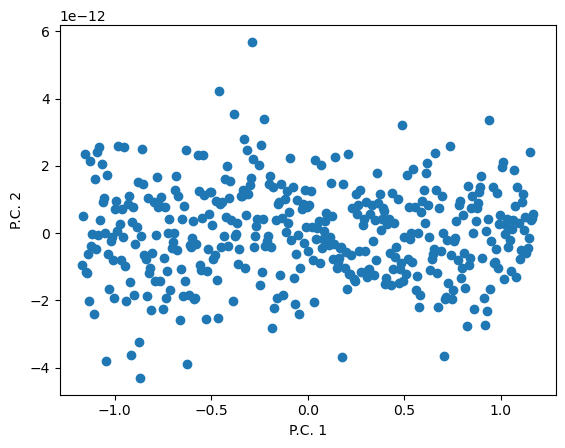

In [32]:
import matplotlib.pyplot as plt

# Graph first two principal components
x = pca_matrix[:, 0]
y = pca_matrix[:, 1]
plt.scatter(x,y)
plt.xlabel("P.C. 1")
plt.ylabel("P.C. 2")
plt.show()

In [33]:
# Adding column of ACGAMT flux values to dataframe for annotation
matrix_df_2 = pd.DataFrame(row_list)
ACGAMT_flux_values = my_flux_vals.tolist()
ACGAMT_flux_values

[0.000545206452965,
 0.0005870670974155559,
 0.0006289277418661117,
 0.0006707883863166675,
 0.0007126490307672234,
 0.0007545096752177793,
 0.000796370319668335,
 0.0008382309641188909,
 0.0008800916085694467,
 0.0009219522530200025,
 0.0009638128974705584,
 0.0010056735419211142,
 0.00104753418637167,
 0.0010893948308222257,
 0.0011312554752727817,
 0.0011731161197233375,
 0.0012149767641738934,
 0.0012568374086244492,
 0.001298698053075005,
 0.0013405586975255607,
 0.0013824193419761167,
 0.0014242799864266724,
 0.0014661406308772284,
 0.0015080012753277841,
 0.00154986191977834,
 0.0015917225642288959,
 0.0016335832086794516,
 0.0016754438531300074,
 0.0017173044975805634,
 0.001759165142031119,
 0.0018010257864816749,
 0.0018428864309322308,
 0.0018847470753827866,
 0.0019266077198333423,
 0.0019684683642838983,
 0.002010329008734454,
 0.00205218965318501,
 0.0020940502976355656,
 0.0021359109420861213,
 0.002177771586536677,
 0.0022196322309872333,
 0.002261492875437789,
 0.00230

In [34]:
matrix_df_2["ACGAMT Flux Values"] = ACGAMT_flux_values
matrix_df_2.shape

(400, 2023)

In [35]:
# Dropping original orfN flux column
matrix_df_2 = matrix_df_2.drop('ACGAMT', axis=1)
matrix_df_2
matrix_df_2.shape

(400, 2022)

In [36]:
# Fit PCA model to matrix
pca_annot = PCA()
pca_annot.fit(matrix_df_2)

PCA()

In [37]:
# Explained variance ratio of each principal component
explained_variance_2 = pca_annot.explained_variance_ratio_
print(explained_variance_2)

[1.00000000e+00 4.29143331e-24 8.74988316e-26 2.99207953e-26
 2.19877036e-26 3.45654397e-27 1.06233349e-27 6.42232500e-28
 5.85324811e-28 4.40153660e-28 3.78847090e-28 2.53830926e-28
 2.00433637e-28 1.19905891e-28 1.10679002e-28 9.17382178e-29
 5.13195978e-29 4.20696832e-29 4.02150606e-29 3.40308394e-29
 3.38732426e-29 2.88867931e-29 2.49525664e-29 2.13862579e-29
 2.05565513e-29 1.70024521e-29 1.62020827e-29 1.47817695e-29
 1.27807670e-29 9.08350248e-30 8.17230936e-30 7.12210818e-30
 5.39446657e-30 4.88859100e-30 4.29580304e-30 3.99471237e-30
 2.80612972e-30 2.66682710e-30 2.36415010e-30 2.23719483e-30
 2.02550880e-30 1.87106336e-30 1.77061732e-30 1.72282226e-30
 1.34920891e-30 1.20275054e-30 1.18567628e-30 9.52784217e-31
 8.73783716e-31 8.06432145e-31 7.88860905e-31 7.23759882e-31
 5.98964115e-31 5.44214765e-31 4.77241488e-31 4.47813797e-31
 4.08983638e-31 3.78023674e-31 3.32159807e-31 3.26928285e-31
 2.89698789e-31 2.63352747e-31 2.52193487e-31 2.14775404e-31
 2.02891251e-31 1.840453

In [38]:
# Keeping only first 2 principial components
pca_annot_2 = PCA(n_components=2)
pca_annot_2.fit(matrix_df_2)
print(pca_annot_2.explained_variance_ratio_)

[1.00000000e+00 4.29144071e-24]


In [39]:
# Transform original matrix to principal component space
pca_matrix_annot = pca_annot_2.transform(matrix_df_2)
print(pca_matrix_annot)
pca_matrix_annot.shape

[[ 1.16776273e+00  5.64256974e-13]
 [ 1.16190928e+00  4.64364658e-13]
 [ 1.15605583e+00  3.97945565e-13]
 [ 1.15020239e+00  2.42582343e-12]
 [ 1.14434894e+00 -1.58623115e-13]
 [ 1.13849549e+00 -4.51083615e-13]
 [ 1.13264205e+00 -5.88945559e-13]
 [ 1.12678860e+00  4.81170659e-13]
 [ 1.12093515e+00  8.17401702e-14]
 [ 1.11508170e+00  1.17159060e-12]
 [ 1.10922826e+00  9.16849929e-13]
 [ 1.10337481e+00 -5.16170440e-13]
 [ 1.09752136e+00 -7.69342923e-13]
 [ 1.09166791e+00  3.15095172e-13]
 [ 1.08581447e+00  1.38568323e-12]
 [ 1.07996102e+00 -1.29146693e-12]
 [ 1.07410757e+00  7.95197241e-13]
 [ 1.06825413e+00  1.89111227e-12]
 [ 1.06240068e+00  3.88175603e-13]
 [ 1.05654723e+00  1.30589983e-13]
 [ 1.05069378e+00 -1.12476695e-12]
 [ 1.04484034e+00 -2.11788920e-13]
 [ 1.03898689e+00 -4.20941060e-13]
 [ 1.03313344e+00  4.06452649e-13]
 [ 1.02727999e+00  2.34798292e-13]
 [ 1.02142655e+00 -3.60961261e-14]
 [ 1.01557310e+00 -1.35259859e-12]
 [ 1.00971965e+00  2.11740347e-12]
 [ 1.00386621e+00  1

(400, 2)

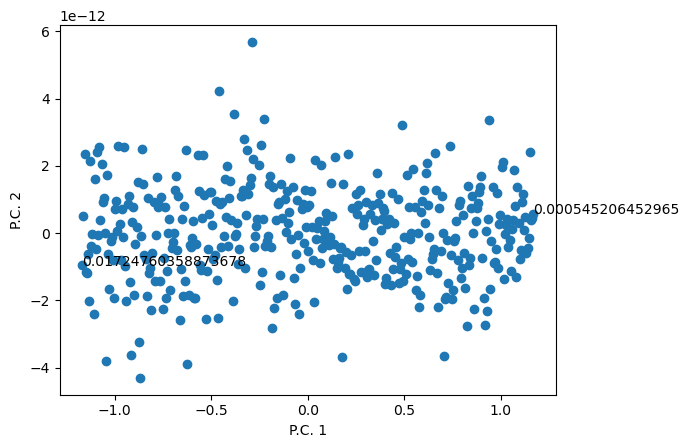

In [41]:
# Plot the first two principal components
plt.scatter(pca_matrix_annot[:, 0], pca_matrix_annot[:, 1])

# Index for first and last points
annotate_index = [0, -1]

# Annotate first and last points
for i in annotate_index:
    x, y = pca_matrix_annot[i, :]
    plt.annotate(ACGAMT_flux_values[i], (x, y))
    
# Index for min y value
# min_y_value = pca_matrix[:, 1].argmin()

# Annotate point with min y value
# x, y = pca_matrix_2[min_y_value, :]
# plt.annotate(orfN1_flux_values[min_y_value], (x, y))

plt.xlabel("P.C. 1")
plt.ylabel("P.C. 2")
plt.show()

#### P.C. 1 seems negatively correlated with growth. P.C. 2 is neglibible because the axis is so small.

### Graph orfN Rxn ACGAMT Fluxes vs. Resulting Biomass Function

In [45]:
ACGAMT_growth_df = pd.DataFrame()
ACGAMT_growth_df["ACGAMT Fluxes"] = ACGAMT_flux_values
ACGAMT_growth_df

,ACGAMT Fluxes
0,0.000545
1,0.000587
2,0.000629
3,0.000671
4,0.000713
...,...
395,0.017080
396,0.017122
397,0.017164
398,0.017206


In [43]:
# Create empty list to input growth values for each orfN flux
growth_list = []
# Loop through orfN fluxes to get corresponding growth values
for flux in ACGAMT_flux_values:
    # Reset model
    # reset_model(model, default_bounds, 'BIOMASS_PA14_v27M')
    # Set orfN flux bounds
    ACGAMT_rxn.bounds = flux, flux
    solution = model.optimize(objective_sense='maximize')
    growth_list.append(solution.objective_value)
growth_list

[0.05,
 0.053838971844785116,
 0.05767794368957022,
 0.061516915534355336,
 0.06535588737914044,
 0.06919485922392556,
 0.07303383106871066,
 0.07687280291349577,
 0.08071177475828087,
 0.08455074660306597,
 0.0883897184478511,
 0.09222869029263621,
 0.09606766213742132,
 0.09990663398220642,
 0.10374560582699155,
 0.10758457767177665,
 0.11142354951656175,
 0.11526252136134686,
 0.11910149320613196,
 0.12294046505091703,
 0.12677943689570215,
 0.1306184087404873,
 0.1344573805852724,
 0.1382963524300575,
 0.1421353242748426,
 0.14597429611962776,
 0.14981326796441283,
 0.1536522398091979,
 0.15749121165398305,
 0.16133018349876815,
 0.16516915534355325,
 0.16900812718833835,
 0.1728470990331235,
 0.17668607087790855,
 0.1805250427226937,
 0.1843640145674788,
 0.1882029864122639,
 0.19204195825704906,
 0.1958809301018341,
 0.19971990194661926,
 0.20355887379140436,
 0.20739784563618952,
 0.21123681748097456,
 0.21507578932575977,
 0.2189147611705448,
 0.2227537330153299,
 0.22659270486

In [46]:
# Add growth list to dataframe
ACGAMT_growth_df["Growth Values"] = growth_list
ACGAMT_growth_df

,ACGAMT Fluxes,Growth Values
0,0.000545,0.050000
1,0.000587,0.053839
2,0.000629,0.057678
3,0.000671,0.061517
4,0.000713,0.065356
...,...,...
395,0.017080,1.566394
396,0.017122,1.570233
397,0.017164,1.574072
398,0.017206,1.577911


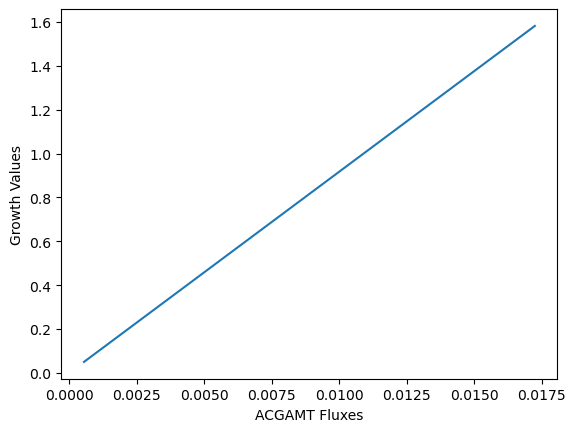

In [48]:
plt.plot(ACGAMT_growth_df["ACGAMT Fluxes"], ACGAMT_growth_df["Growth Values"])
plt.xlabel("ACGAMT Fluxes")
plt.ylabel("Growth Values")
plt.show()